<a href="https://colab.research.google.com/github/tiravata/2014-slides/blob/master/011_TF2_0_Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 348.9MB 63kB/s 
     |████████████████████████████████| 3.1MB 28.4MB/s 
     |████████████████████████████████| 501kB 39.0MB/s 
2.0.0-beta1


In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

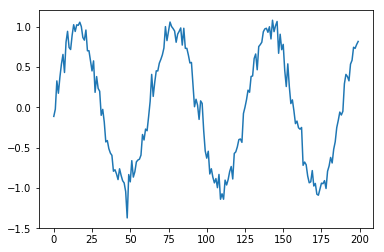

In [0]:
# make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [0]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [0]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 1ms/sample - loss: 1.0875 - val_loss: 0.5615
Epoch 2/80
95/95 [==============================] - 0s 164us/sample - loss: 0.7375 - val_loss: 0.9334
Epoch 3/80
95/95 [==============================] - 0s 125us/sample - loss: 0.4898 - val_loss: 0.2677
Epoch 4/80
95/95 [==============================] - 0s 140us/sample - loss: 0.2089 - val_loss: 0.2244
Epoch 5/80
95/95 [==============================] - 0s 144us/sample - loss: 0.2365 - val_loss: 0.1196
Epoch 6/80
95/95 [==============================] - 0s 131us/sample - loss: 0.0869 - val_loss: 0.0584
Epoch 7/80
95/95 [==============================] - 0s 144us/sample - loss: 0.1090 - val_loss: 0.0836
Epoch 8/80
95/95 [==============================] - 0s 129us/sample - loss: 0.1053 - val_loss: 0.0410
Epoch 9/80
95/95 [==============================] - 0s 141us/sample - loss: 0.0571 - val_loss: 0.0603
Epoch 10/80
95/95 [=====================

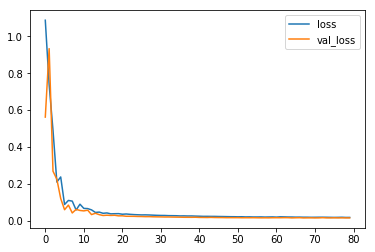

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

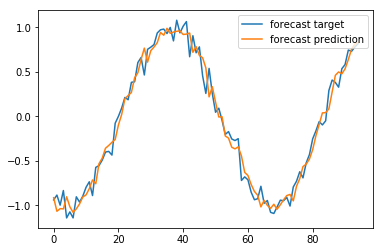

In [0]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [0]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

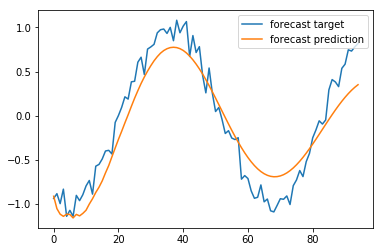

In [0]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()